In [1]:
import urllib.request
import pandas as pd
import geopandas as gpd
import shapely
import matplotlib.pylab as plt
import numpy as np
from pandas import DataFrame
from geopandas import GeoDataFrame
import requests
from requests import request
#from shapely.geometry import LineString, Point
import os
import sys
import io
import json
from configparser import ConfigParser 
%matplotlib inline

In [2]:
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

In [3]:
os.chdir(os.getenv("PUIDATA"))

In [4]:
os.getcwd()

'/nfshome/fb1182/PUIdata'

In [5]:
urllib.request.urlretrieve('https://data.cityofnewyork.us/api/geospatial/cwiz-gcty?method=export&format=Shapefile', "Public Use Microdata Areas (PUMA).zip")

('Public Use Microdata Areas (PUMA).zip',
 <http.client.HTTPMessage at 0x7f6c016c9550>)

In [5]:
!ls

201501-citibike-tripdata.csv	      FHVBaseAggregateReport.csv
201501-citibike-tripdata.zip	      HW3_fb1182
201601-citibike-tripdata.csv	      HW7_fb1182
201601-citibike-tripdata.zip	      linkNYClocations.csv
201701-citibike-tripdata.zip	      nyc_pluto_18v1.zip
ACS_16_1YR_GCT2801.ST50_metadata.csv  PLUTO_for_WEB
ACS_16_1YR_GCT2801.ST50.txt	      Public Use Microdata Areas (PUMA).zip
ACS_16_1YR_GCT2801.ST50_with_ann.csv  PUMA
ACS_16_1YR_GCT2801.ST50.zip	      python-geospatial-2018
aff_download_readme_ann.txt	      ReadingPLUTO.ipynb
Assignment1.ipynb		      Untitled1.ipynb
citi_bike_agegroup.ipynb	      Untitled.ipynb
config.py			      Z-score.ipynb


In [6]:
#!unzip Public\ Use\ Microdata\ Areas\ \(PUMA\).zip

In [7]:
shape_path="PUMA/geo_export_7945c52d-08c4-43b8-ba7f-fb0672689ad7.shp"
pumashp = GeoDataFrame.from_file(shape_path)

In [8]:
pumashp.head()

,puma,shape_area,shape_leng,geometry
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,..."
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,4015,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...


In [9]:
pumashp.crs

{'init': 'epsg:4326'}

In [19]:
!{sys.executable} -m pip install --user git+https://github.com/fedhere/choroplethNYC.git

  Cloning https://github.com/fedhere/choroplethNYC.git to /tmp/pip-7h08cx0k-build
You are using pip version 8.1.2, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


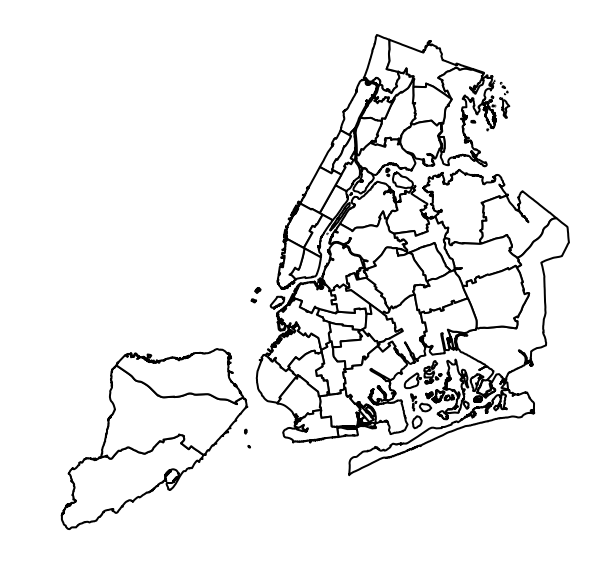

In [10]:
import choroplethNYC as cp
cp.choroplethNYC(pumashp, column=None, color="white", edgecolor="black", lw=2);

In [22]:
#!{sys.executable} -m pip install --user CensusData

You are using pip version 8.1.2, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
filename = 'config.py'

In [12]:
def get_file_contents(filename):
    """ Given a filename,
        return the contents of that file
    """
    try:
        with open(filename, 'r') as f:
            # It's assumed our file contains a single line,
            # with our API key
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)

In [13]:
api_key = get_file_contents(filename)

In [14]:
#read in in the variables available. the info we need is in the 1year ACS data
url = "https://api.census.gov/data/2016/acs/acs1/variables.json"
resp = requests.request('GET', url)
aff1y = json.loads(resp.text)

In [15]:
#turning things into arrays to enable broadcasting
#Python3
affkeys = np.array(list(aff1y['variables'].keys()))

In [16]:
#extracting variables of B28002 that contain "broadband"
[(k, aff1y['variables'][k]['label'])  for k in affkeys if k.startswith ("B28002") and 
 'Broadband' in aff1y['variables'][k]['label']]

[('B28002_008E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription'),
 ('B28002_004E',
  'Estimate!!Total!!With an Internet subscription!!Broadband of any type'),
 ('B28002_007E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL')]

In [17]:
#keyword for the number of households with broarband access
keyNBB = 'B28002_004E'
aff1y['variables'][keyNBB]

{'attributes': 'B28002_004M,B28002_004EA',
 'concept': 'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 'group': 'B28002',
 'label': 'Estimate!!Total!!With an Internet subscription!!Broadband of any type',
 'limit': 0,
 'predicateType': 'int'}

In [18]:
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNBB +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + api_key
resp = requests.request('GET', url).content
pumaPP = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

pumaPP.head()

,B28002_004E,NAME,state,public use microdata area,Unnamed: 4
0,32607,"St. Lawrence County PUMA, New York",36,100,NaN
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,41210,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,47786,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


In [19]:
#keyword for the number of households
keyNHS = 'B28002_001E'
aff1y['variables'][keyNHS]

{'attributes': 'B28002_001M,B28002_001EA',
 'concept': 'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 'group': 'B28002',
 'label': 'Estimate!!Total',
 'limit': 0,
 'predicateType': 'int'}

In [20]:
# getting the broadband access number of households
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNHS +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + api_key
resp = requests.request('GET', url).content
pumaBB = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

pumaBB.head()

,B28002_001E,NAME,state,public use microdata area,Unnamed: 4
0,40479,"St. Lawrence County PUMA, New York",36,100,NaN
1,67092,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,51614,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,44300,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,61146,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


In [27]:
#!unzip ACS_16_1YR_GCT2801.ST50.zip

In [21]:
bbpc = pd.read_csv(os.getenv("PUIDATA") + "/ACS_16_1YR_GCT2801.ST50_with_ann.csv",
            usecols=["GCT_STUB.target-geo-id2","HC01","HC02"], skiprows=[1])
bbpc.head()

,GCT_STUB.target-geo-id2,HC01,HC02
0,1,74.7,0.5
1,100100,70.9,2.5
2,100200,80.5,2.7
3,100301,87.0,2.8
4,100302,81.9,2.9


In [22]:
pumaBB.columns

Index(['B28002_001E', 'NAME', 'state', 'public use microdata area',
       'Unnamed: 4'],
      dtype='object')

In [23]:
pumaBB = pd.merge(pumaBB, pumaPP, on=['NAME', 'state', 'public use microdata area']) 

In [24]:
pumaBB.head()

,B28002_001E,NAME,state,public use microdata area,Unnamed: 4_x,B28002_004E,Unnamed: 4_y
0,40479,"St. Lawrence County PUMA, New York",36,100,NaN,32607,NaN
1,67092,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN,50811,NaN
2,51614,"Warren & Washington Counties PUMA, New York",36,300,NaN,41210,NaN
3,44300,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN,36075,NaN
4,61146,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN,47786,NaN


In [25]:
pumaBB.drop('Unnamed: 4_y', axis=1, inplace=True)

In [26]:
pumaBB.head()

,B28002_001E,NAME,state,public use microdata area,Unnamed: 4_x,B28002_004E
0,40479,"St. Lawrence County PUMA, New York",36,100,NaN,32607
1,67092,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN,50811
2,51614,"Warren & Washington Counties PUMA, New York",36,300,NaN,41210
3,44300,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN,36075
4,61146,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN,47786


In [27]:
pumaBB.drop('Unnamed: 4_x', axis=1, inplace=True)

In [28]:
pumaBB.head()

,B28002_001E,NAME,state,public use microdata area,B28002_004E
0,40479,"St. Lawrence County PUMA, New York",36,100,32607
1,67092,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,50811
2,51614,"Warren & Washington Counties PUMA, New York",36,300,41210
3,44300,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,36075
4,61146,Oneida County (Central)--Greater Utica & Rome ...,36,402,47786


In [29]:
pumaBB['pcBB'] = pumaBB['B28002_004E']/pumaBB['B28002_001E']

In [30]:
pumaBB.head()

,B28002_001E,NAME,state,public use microdata area,B28002_004E,pcBB
0,40479,"St. Lawrence County PUMA, New York",36,100,32607,0.805529
1,67092,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,50811,0.757333
2,51614,"Warren & Washington Counties PUMA, New York",36,300,41210,0.798427
3,44300,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,36075,0.814334
4,61146,Oneida County (Central)--Greater Utica & Rome ...,36,402,47786,0.781507


In [31]:
bbpc = pd.read_csv(os.getenv("PUIDATA") + "/ACS_16_1YR_GCT2801.ST50_with_ann.csv",
            usecols=["GCT_STUB.target-geo-id2","HC01","HC02"], skiprows=[1])
bbpc.head()

,GCT_STUB.target-geo-id2,HC01,HC02
0,1,74.7,0.5
1,100100,70.9,2.5
2,100200,80.5,2.7
3,100301,87.0,2.8
4,100302,81.9,2.9


In [36]:
bbpc.columns

Index(['GCT_STUB.target-geo-id2', 'HC01', 'HC02', 'gid'], dtype='object')

In [52]:
bbpc['GCT_STUB.target-geo-id2'] = bbpc['GCT_STUB.target-geo-id2'].astype(int)

In [53]:
bbpc['gid'] = bbpc['GCT_STUB.target-geo-id2'].replace(bbpc['GCT_STUB.target-geo-id2'][3:], '')

In [54]:
bbpc.head()

,GCT_STUB.target-geo-id2,HC01,HC02,gid
0,1,0.5,0.5,1
1,100100,2.5,2.5,100100
2,100200,2.7,2.7,100200
3,100301,2.8,2.8,
4,100302,2.9,2.9,


In [55]:
bbpc.tail()

,GCT_STUB.target-geo-id2,HC01,HC02,gid
2425,7200902,2.4,2.4,
2426,7201001,2.9,2.9,
2427,7201002,3.3,3.3,
2428,7201101,3.7,3.7,
2429,7201102,4.6,4.6,


In [57]:
bbpc['HC01'] = bbpc['HC01'].astype(float)

In [58]:
bbpc['HC01'] = bbpc['HC02'].astype(float)

In [59]:
pumaBB['public use microdata area'] = pumaBB['public use microdata area'].astype(int)

In [60]:
pumaBB['pcBB'] = pumaBB['pcBB'].astype(float)

In [61]:
bbpc.columns

Index(['GCT_STUB.target-geo-id2', 'HC01', 'HC02', 'gid'], dtype='object')

In [62]:
diff_ = pumaBB.merge(bbpc, right_on="gid", 
                     left_on="public use microdata area")[["pcBB", "HC01"]]
diff_["diff"] = np.abs(diff_["pcBB"].astype(float) - diff_["HC01"].astype(float))

diff_.describe()

,pcBB,HC01,diff
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [63]:
diff_.head()

,pcBB,HC01,diff


In [64]:
pumaBB.tail()

,B28002_001E,NAME,state,public use microdata area,B28002_004E,pcBB
140,61570,"NYC-Queens Community District 5--Ridgewood, Gl...",36,4110,50844,0.825792
141,44811,NYC-Queens Community District 9--Richmond Hill...,36,4111,37570,0.838410
142,71109,"NYC-Queens Community District 12--Jamaica, Hol...",36,4112,54603,0.767877
143,37998,NYC-Queens Community District 10--Howard Beach...,36,4113,32506,0.855466
144,41368,NYC-Queens Community District 14--Far Rockaway...,36,4114,32172,0.777703


In [65]:
bbpc.dtypes

GCT_STUB.target-geo-id2      int64
HC01                       float64
HC02                       float64
gid                         object
dtype: object

In [66]:
pumaBB.dtypes

B28002_001E                    int64
NAME                          object
state                          int64
public use microdata area      int64
B28002_004E                    int64
pcBB                         float64
dtype: object

In [67]:
diff_ = pumaBB.merge(bbpc, right_on="GCT_STUB.target-geo-id2", 
                     left_on="public use microdata area")[["HC01", "pcBB"]]
diff_.head()

,HC01,pcBB


In [68]:
linkNYC = pd.read_csv('linkNYClocations.csv')

In [69]:
linkNYC.head()

,link_site,longitude,date_link_,latitude
0,bk-01-138951,-73.942489,7/1/2017,40.701668
1,bk-01-109091,-73.942169,7/1/2017,40.701542
2,bk-01-143982,-73.942239,7/1/2017,40.701930
3,bk-01-109262,-73.942918,4/28/2017,40.705060
4,bk-01-125268,-73.953439,3/31/2017,40.728133


In [70]:
linkNYC.shape

(1414, 4)

In [71]:
import shapely
# combine lat and lon to one column
linkNYC['lonlat']=list(zip(linkNYC.longitude,linkNYC.latitude))
# Create Point Geometry for based on lonlat column
linkNYC['geometry']=linkNYC[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
linkNYC.head()

,link_site,longitude,date_link_,latitude,lonlat,geometry
0,bk-01-138951,-73.942489,7/1/2017,40.701668,"(-73.94248859, 40.70166753)",POINT (-73.94248859 40.70166753)
1,bk-01-109091,-73.942169,7/1/2017,40.701542,"(-73.94216928, 40.70154219)",POINT (-73.94216928 40.70154219)
2,bk-01-143982,-73.942239,7/1/2017,40.701930,"(-73.94223924, 40.70193034)",POINT (-73.94223924000001 40.70193034)
3,bk-01-109262,-73.942918,4/28/2017,40.705060,"(-73.94291758, 40.70506042)",POINT (-73.94291758 40.70506042)
4,bk-01-125268,-73.953439,3/31/2017,40.728133,"(-73.953439, 40.728133)",POINT (-73.953439 40.728133)


In [72]:
from fiona.crs import from_epsg
linkNYC.crs = from_epsg(4326)

In [73]:
linkNYC.crs

{'init': 'epsg:4326', 'no_defs': True}

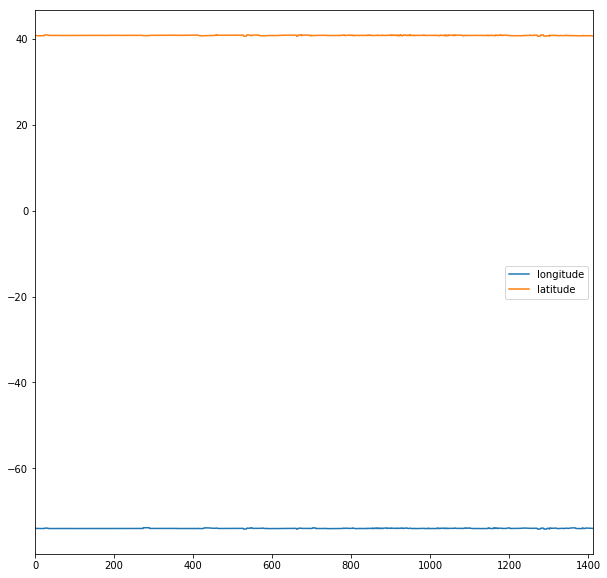

In [75]:
linkNYC.plot(figsize=(10,10)) 